In [1]:
import urllib
from bs4 import BeautifulSoup
import argparse
#import spotify
import json
from io import StringIO
import subprocess
import traceback
from urllib.parse import quote
import pandas as pd

In [2]:
test=pd.read_csv('englyrics.csv')
test.head()

,Unnamed: 0,song_id,lyrics
0,0,3727054,\n\n(It's Frankie! Frankie! Frankie!)\n\nHenry...
1,1,883686,\n\nDon't stop out too late at night\nStop! It...
2,2,622840,\n\n[Verse 1]\nSooner or later everybody's got...
3,3,1263032,"\n\nGround below, just save me from it all\nGr..."
4,4,406918,\n\n[Voiceover]\nPlease Hold while the baller ...


In [4]:
df_lyric = test.drop(['lyrics','Unnamed: 0'], axis=1)

In [3]:
df_clean=pd.read_csv('song_id_no_duplicates.csv')

/Users/zhangben/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [47]:
df_lyric.head()

,song_id
0,3727054
1,883686
2,622840
3,1263032
4,406918


In [48]:
df_clean.head()

,song_id,ISRC,SPOTIFY_ID,TITLE,ARTIST
0,3035330,USRC11702155,1j4kHkkpqZRBwE0A4CN4Yv,Dusk Till Dawn - Radio Edit,ZAYN
1,3646568,USUM71805170,7dt6x5M1jzdTEt8oCbisTK,Better Now,Post Malone
2,2942139,USUM71710087,7wGoVu4Dady5GV0Sv4UIsx,rockstar,Post Malone
3,2992529,USSM11706905,0ofbQMrRDsUaVKq2mGLEAb,Havana,Camila Cabello
4,3188009,USRC11701901,7vGuf3Y35N4wmASOKLUVVU,Silence,Marshmello


In [5]:
df_clean_id = df_clean['song_id'].values.tolist()

In [7]:
len(df_clean_id)

286110

In [6]:
df_lyric_id = df_lyric['song_id'].values.tolist()

In [8]:
len(df_lyric_id)

159125

In [68]:
df_lyric_inter = list(set(df_clean_id) & set(df_lyric_id))

In [79]:
len(df_lyric_inter)

97358

In [ ]:
df_clean.loc[df['song_id']]

In [98]:
# df_audio = pd.merge([df_lyric, df_clean], how='inner', on=['song_id'])
# df_audio = df_clean.join(df_lyric, lsuffix='_song_id', how='inner')

df_audio = df_clean.loc[df_clean['song_id'].isin(df_lyric_inter)]
df_audio_dedup = df_audio.drop_duplicates(subset='song_id', keep="last")

In [101]:
df_audio_dedup.to_csv('df_extracting_tracks.csv')

In [94]:
# find duplicates 
alldataset, seen, dup = df_clean['song_id'], set(),[]
for idx, item in enumerate(alldataset):
    if item not in seen:
        seen.add(item)
    else:
        dup.append(idx)
train_dup_idx = [i for i in dup if i < 25000]
test_dup_idx = [i-25000 for i in dup if i>=25000]
print(len(train_dup_idx),len(test_dup_idx))

0 3732


In [102]:
df_audio_dedup.head()

,song_id,ISRC,SPOTIFY_ID,TITLE,ARTIST
131072,2222157,FR7LB1700002,4eFzE4dskTdwXqPKATqjsy,The Lights,Concrete Knives
131073,491405,QZ9RV1700004,5t0AE0PPtbE66JissfZFOA,AllRight,Joji Ruffin
131075,1369717,USMTD0985602,158mw0CsuSHxTVWpMwN2Lp,Avalon or Someone Very Similar,Yo La Tengo
131076,3150542,QZANL1773974,4sBj3qUIPBkIMcRVlh6iXI,Let It Bleed,Smrtdeath
131077,3511181,DED831701689,6Pp33kxBzDtxBuNWqkkgaO,Jewels From Afar,Therion


In [80]:
len(df_clean['song_id'].isin(df_lyric_inter))

286110

In [3]:
df_extracting_tracks=pd.read_csv('df_extracting_tracks.csv').drop(['Unnamed: 0'],axis=1)
df_extracting_tracks.head()

,song_id,ISRC,SPOTIFY_ID,TITLE,ARTIST
0,2222157,FR7LB1700002,4eFzE4dskTdwXqPKATqjsy,The Lights,Concrete Knives
1,491405,QZ9RV1700004,5t0AE0PPtbE66JissfZFOA,AllRight,Joji Ruffin
2,1369717,USMTD0985602,158mw0CsuSHxTVWpMwN2Lp,Avalon or Someone Very Similar,Yo La Tengo
3,3150542,QZANL1773974,4sBj3qUIPBkIMcRVlh6iXI,Let It Bleed,Smrtdeath
4,3511181,DED831701689,6Pp33kxBzDtxBuNWqkkgaO,Jewels From Afar,Therion


In [9]:
df_extracting_tracks.shape

(97358, 5)

In [14]:
# df_sampled_12000 = df_extracting_tracks.sample(n=12000, random_state=133, axis=0)
# df_sampled_12000.to_csv('df_sampled_12000.csv', index=False)

In [2]:
df_test=pd.read_csv('df_sampled_12000.csv')
df_test.head()

,song_id,ISRC,SPOTIFY_ID,TITLE,ARTIST
0,3348279,TCACJ1521062,4e7XZXkEbKcyci1v7pTd4n,Destiny: Defending You,Rockit Gaming
1,2854130,USSM16701613,18cjJh0XUoklskcKr4Tj36,Oh Death,Kaleidoscope
2,743230,KRA381703075,3MdXREDeMhXIEwBRdLrtHx,Listen to this song,Kassy
3,3537980,QZDA41892053,36AfYQNg8aVNmA7PY59C49,Sweetness,Marzville
4,1636908,DEBL60409956,3F0BoCwXHNK1K3AmTQFDhc,Alabama,The Louvin Brothers


In [4]:
df_SPOTIFY_id = df_test['SPOTIFY_ID'].values.tolist()

In [6]:
df_left = df_extracting_tracks.loc[~df_extracting_tracks['SPOTIFY_ID'].isin(df_SPOTIFY_id)]

In [11]:
df_left.to_csv('df_left.csv', index=False)

In [9]:
def searchYoutube(trackname):
    textToSearch = trackname
    query = quote(textToSearch)
    url = "https://www.youtube.com/results?search_query=" + query
    response = urllib.request.urlopen(url)
    html = response.read()
    soup = BeautifulSoup(html, "html.parser")
    #we return the first result
    return "https://youtube.com" + soup.findAll(attrs={'class':'yt-uix-tile-link'})[0]['href']

In [10]:
searchYoutube('In My Feelings')

'https://youtube.com/watch?v=DRS_PpOrUZ4'

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np
import os

In [2]:
%ls

Data_explore.ipynb
Weekly Charts/
a_level_artists.xlsx*
max popularity by track.csv*
new Sep test tracks.csv*
spotify_competitor_tracks-updated_sep14.xlsx*
weekly viral & top 200.csv*
weekly_chart_concat.csv
~$spotify_competitor_tracks-updated_sep14.xlsx


# combine weekly charts

In [3]:
chart_list = []
for f in os.listdir('Weekly Charts'):
    if not f.startswith('.'):
        filepath = 'Weekly Charts/' + f
        df_chart = pd.read_excel(filepath)
        df_us = df_chart.loc[df_chart['Country']=='US']
        df_us['Week'] = ' '.join(f.split()[6:8])
        df_us['Date'] = ' '.join(f.split()[8:-1]).replace('(' , '').replace(')', '')
        chart_list.append(df_us)

/Users/zhangben/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/zhangben/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [4]:
chart_concat = pd.concat(chart_list)
final_chart_concat = chart_concat.groupby('Week').apply(lambda x: x.sort_values('Rank'))
final_chart_concat.to_csv('weekly_chart_concat.csv',index = 0 ) # index_label = 'Week'

In [9]:
test=pd.read_csv('weekly_chart_concat.csv')
df_20 = test.loc[0:20, ['Track Name', 'Main Artists']]

In [31]:
test.head()

,Country,Track Name,Main Artists,URI,Streams,Rank,Movement,Streams Increase,% Increase,Week,Date
0,US,Bad and Boujee (feat. Lil Uzi Vert),Migos,spotify:track:1FvU97lrWOG2NRxErh6OZz,9191691,1,1,1257660,0.1585146314653925,30 -,Jan 5
1,US,Fake Love,Drake,spotify:track:6NMNgWgEAzde5M8U3lc6FN,8432766,2,-1,-224702,-0.02595470176730656,30 -,Jan 5
2,US,Starboy,The Weeknd,spotify:track:5aAx2yezTd8zXrkmtKl66Z,7655912,3,0,-106856,-0.01376519303423727,30 -,Jan 5
3,US,Closer,The Chainsmokers,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,6411401,4,1,573335,0.09820632380654827,30 -,Jan 5
4,US,Black Beatles,Rae Sremmurd,spotify:track:6fujklziTHa8uoM5OQSfIo,5747264,5,-1,-466257,-0.07503909619038868,30 -,Jan 5


In [10]:
import requests
import time
import re
import os

In [19]:
# payload = {'keyword': '日本', 'salecityid': '2'}
param = {"mp3": 'Starboy'}
r = requests.get("https://mp3gratis.co/download/", params=param) 
print(r.url) #示例为http://m.ctrip.com/webapp/tourvisa/visa_list?salecityid=2&keyword=日本

https://mp3gratis.co/download/?mp3=Starboy


In [21]:
import urllib
from bs4 import BeautifulSoup # latest version bs4

In [30]:
soup = BeautifulSoup(urllib.request.urlopen("https://mp3gratis.co/").read(), 'lxml')

song = soup.find_all({'mp3': 'starboy'})

print(song)

[]


In [ ]:
class MUSIC:
    def __init__(self):
        self.header = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; WOW64) AppleW"
                                    "ebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36"}
        self.song_list = []
        self.song_number = 0
        self.sing_name = ""
 
    def search_music(self, singer_name, track_name):
        """搜索歌手名字
           获取该歌手所有歌曲id
        """
        url = "https://mp3gratis.co/"
        self.sing_name = singer_name
        self.track_name = track_name
        param = {"key_singer": singer_name,"key_track": track_name}
        response = requests.get(url, params=param, headers=self.header)
        response.encoding = "utf-8"
        html = response.text
        # 先找到该歌手的歌曲总数
        number = re.findall(r'<span class="number">(\d+)</span>', html)
        song_number = number[0]
        print("已找到歌手%s的歌曲%s首" % (singer_name,song_number))
        song_number = int(song_number)
        self.song_number = song_number
        song_list =[]
        for i in range(song_number//20 + 1):
            param = {
                "s": 1,
                "key": singer_name,
                "jump": 0,
                "start": i*20,
                "size": i*20+20,
                "third_type": 0,
            }
            response = requests.get(url, params=param, headers=self.header)
            response.encoding = "utf-8"
            html = response.text
            song_id = re.findall(r'sid":(\d+)', html)
            song_list += song_id
            time.sleep(1)
        self.song_list = song_list
 
    def download_music(self, path):
        """下载音乐"""
        url = "http://play.baidu.com/data/music/songlink"
        data = {
            "songIds": ','.join(self.song_list),
            "hq": 0,
            "type": "mp3",
            "pt": 0,
            "flag": -1,
            "s2p": -1,
            "prerate": -1,
            "bwt": -1,
            "dur": -1,
            "bat": -1,
            "bp": -1,
            "pos": -1,
            "auto": -1,
        }
        response = requests.post(url,data=data,headers=self.header)
        song_info = response.json()
        song_info = song_info["data"]["songList"]
        i = 0
        path = path + "\\" + self.sing_name
        self.mkdir(path)
        for song in song_info:
            song_name = song['songName']
            i +=1
            with open(path + "\\"+ '%s.mp3' % song_name,'wb') as f:
                # 下载mp3文件
                response = requests.get(song['songLink'], headers=self.header)
                f.write(response.content)
                print("已下载%s %d/%d" %(song_name,i,self.song_number))
                time.sleep(1)
 
    def mkdir(self, path):
        """判断路径是否存在,如果不存在,创建路径"""
        path = path.strip()
        path = path.rstrip("\\")
        isExists = os.path.exists(path)
        if not isExists:
            # 如果不存在路径，创建路径
            os.makedirs(path)


In [3]:
artist_level = pd.read_excel("a_level_artists.xlsx")
artist_level.head(200)

,artist_id,artist_name,number_of_tracks,number_of_albums,number_of_playlists,playlist_followers,highest_song_popularity,average_song_popularity,A_Level_Artist?,B_Level Artist?
0,3TVXtAsR1Inumwj472S9r4,Drake,263,255,39875,710070329,100,55.859119,1,0
1,6LuN9FCkKOj5PcnpouEgny,Khalid,46,56,13841,378377698,98,75.597498,0,1
2,3wyVrVrFCkukjdVIdirGVY,Lil Pump,34,32,6003,191866217,98,68.586418,0,1
3,1OAjDaKgg00KCUYqDe68un,Gigi D'Agostino,184,94,3243,130813283,97,64.911651,0,0
4,0Y5tJX1MQlPlqiwlOH1tJY,Travis Scott,122,107,16642,299194507,97,68.611220,1,0


In [ ]:
def main()

In [4]:
max_pop=pd.read_csv("max popularity by track.csv")
max_pop.head()

/Users/zhangben/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,track_id,track_external_id,max_popularity
0,3iI3pi9bAFrDW74UxyzMJ0,DEC611100411,30
1,7FPXqN2DDiG5JASUjEi8Ua,ARG991022790,13
2,1SHeg1buNhS90Uak8gsx9A,ARW251100615,27
3,6b5rCLd1UslE8cU1pfk4d0,ATN261562301,39
4,3Q85163sbHgeXmnQUCbkQk,BEB018070417,5


In [45]:
max_pop[max_pop["max_popularity"]=='\\N'].head()

,track_id,track_external_id,max_popularity
31984,artist,Zion & Lennox,\N
104828,artist,Miguel Martinez,\N
175012,artist,Reykon,\N
181722,artist,Nacho,\N
297989,artist,Ozuna,\N


In [40]:
max_pop.head()
max_pop["max_popularity"].replace("\\N","-1",inplace=True)
max_pop["max_popularity"]= max_pop["max_popularity"].fillna(0)
max_pop["max_popularity"]= max_pop["max_popularity"].astype(int)

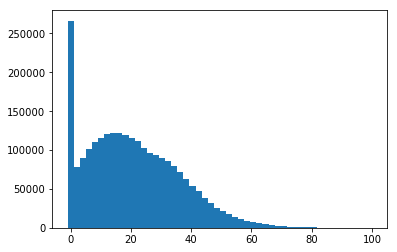

In [41]:
plt.hist(max_pop["max_popularity"],bins=50)
plt.show()

In [47]:
audio = pd.read_excel("spotify_competitor_tracks-updated_sep14.xlsx",sheetname="spotify_competitor_tracks")

In [48]:
audio.head()

,ISRC,SPOTIFY_ID,TITLE,ARTIST,TEMPO,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,SPEECHINESS,INSTRUMENTALNESS,KEY,LIVENESS,TIME_SIGNATURE,MODE,POP,Seconds,Lean-Back
0,USCM51800207,0h1W19pS59KtEd7aDzF58i,In My Feelings,Drake,91.022,0.619,0.833,-5.822,0.366,0.0496,0.0971,0.000087,8,0.300,4,1,100,217925,0
1,USUM71710097,29VZKgZvAjFRxxBnctjqOn,rockstar,Post Malone,159.706,0.503,0.552,-6.759,0.141,0.1380,0.1450,0.000555,5,0.143,4,0,100,218480,0
2,USUM71805184,3AISCGqWZmb6UPxoYrXaA9,Better Now,Post Malone,145.051,0.579,0.686,-5.813,0.352,0.3340,0.0442,0.000000,10,0.135,4,1,100,231266,0
3,USCM51800078,7liAO2OqrFMVvM7oiLo0m0,Nice For What,Drake,186.885,0.899,0.603,-6.558,0.813,0.1050,0.1410,0.000431,8,0.106,4,1,100,210925,0
4,USCM51800005,61T2H6w0ggQdhCvVegLl99,God's Plan,Drake,77.175,0.451,0.758,-9.454,0.353,0.0273,0.1040,0.000095,7,0.566,4,1,100,198960,0


In [49]:
max_pop.head()

,track_id,track_external_id,max_popularity
0,3iI3pi9bAFrDW74UxyzMJ0,DEC611100411,30
1,7FPXqN2DDiG5JASUjEi8Ua,ARG991022790,13
2,1SHeg1buNhS90Uak8gsx9A,ARW251100615,27
3,6b5rCLd1UslE8cU1pfk4d0,ATN261562301,39
4,3Q85163sbHgeXmnQUCbkQk,BEB018070417,5


In [50]:
combine = pd.merge(audio,max_pop,how='left',left_on='SPOTIFY_ID',right_on='track_id')

In [53]:
combine[combine.max_popularity.isnull()==True].shape

(3858, 22)

In [54]:
combine[combine.max_popularity.isnull()==False].shape

(613149, 22)

In [55]:
combine2 = pd.merge(audio,max_pop,how='left',left_on='ISRC',right_on='track_external_id')

In [56]:
combine2[combine2.max_popularity.isnull()==True].shape

(2726, 22)